In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Carregar dataset
df = pd.read_csv("vendas.csv", parse_dates=["data"])

# Agrupar vendas por dia
df_diario = df.groupby("data")["valor_total"].sum().reset_index()
df_diario = df_diario.rename(columns={"data": "ds", "valor_total": "y"})

df_diario.head()


c:\Users\Lara\OneDrive\Área de Trabalho\12-python-projects\vendas_varejo\vendas_varejo\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,ds,y
0,2023-01-01,33904
1,2023-01-04,5431
2,2023-01-05,23989
3,2023-01-08,6315
4,2023-01-09,15039


In [3]:
modelo = Prophet(daily_seasonality=True, yearly_seasonality=False)
modelo.fit(df_diario)


23:24:57 - cmdstanpy - INFO - Chain [1] start processing
23:24:57 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
# Criar datas futuras
futuro = modelo.make_future_dataframe(periods=30)

# Prever
forecast = modelo.predict(futuro)

forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()


,ds,yhat,yhat_lower,yhat_upper
166,2023-07-26,16103.942489,1434.789942,30408.752139
167,2023-07-27,17265.652736,3344.531370,30353.139432
168,2023-07-28,13887.720406,-1197.371013,27736.460807
169,2023-07-29,17028.448660,3296.079062,31791.611559
170,2023-07-30,17346.155077,3754.356138,30285.934001


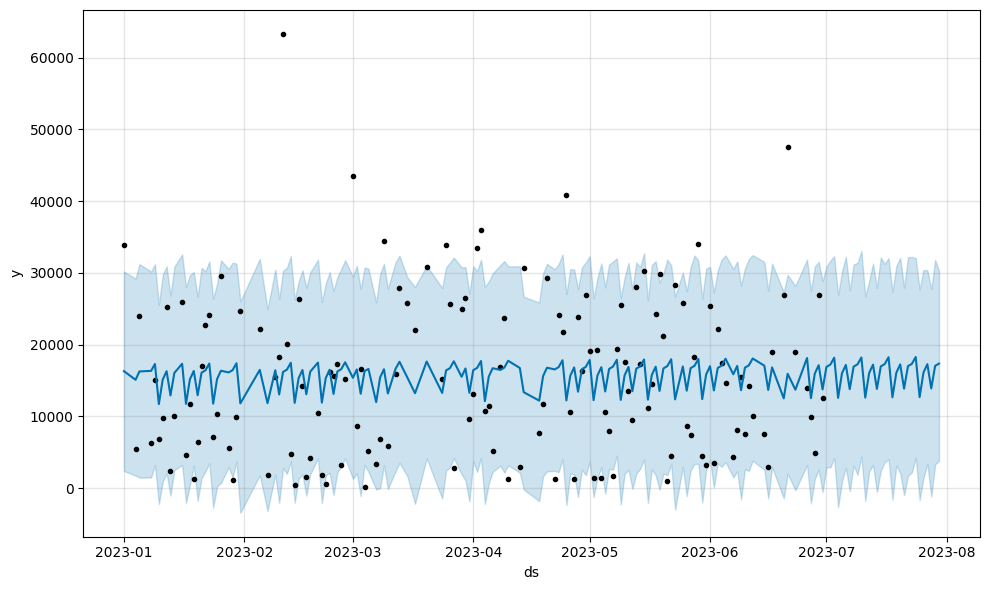

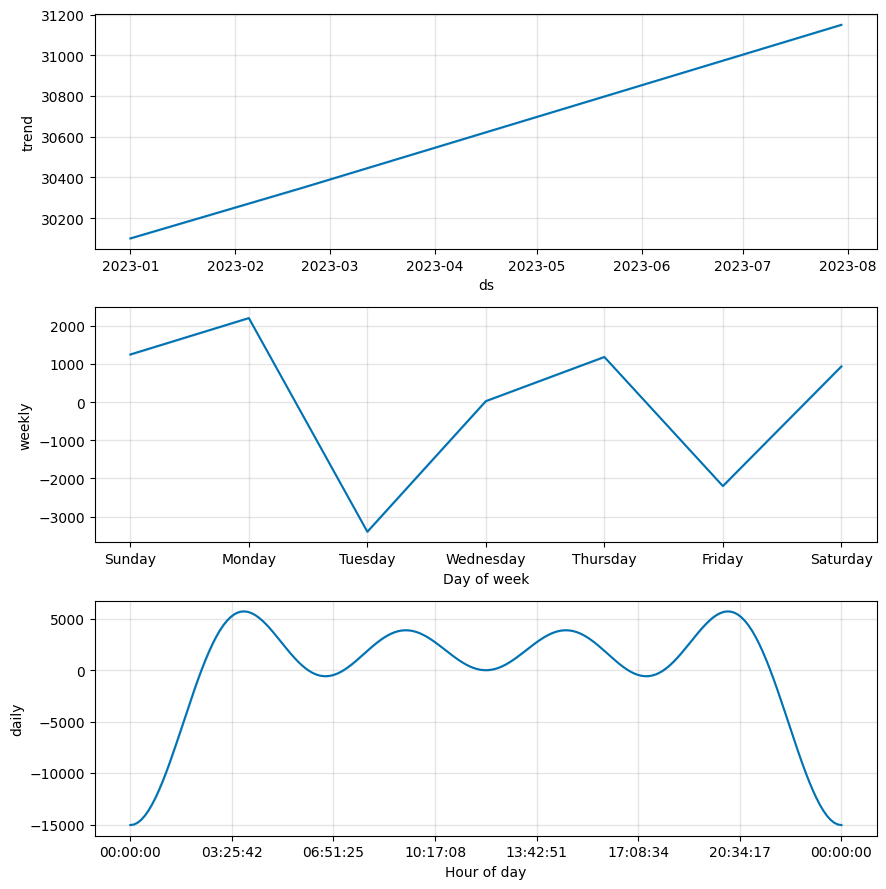

In [5]:
fig1 = modelo.plot(forecast)
plt.show()

fig2 = modelo.plot_components(forecast)
plt.show()


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Comparar previsões com dados reais
y_true = df_diario["y"].values
y_pred = forecast.iloc[:len(y_true)]["yhat"].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 8895.835373837688
RMSE: 11098.491926396493
